### Import modules

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import dataframe_image as dfi
from scipy.stats import ttest_ind, shapiro, levene

### Define functions

In [2]:
def xlsx_to_df(directory, filename):
    
    # Fix directory if needed
    directory = directory.replace('\\', '/')

    # Add backslash
    directory += '/'

    # Return data frame
    return pd.read_excel(directory + filename + '.xlsx')

def csv_to_df(directory, filename):    
    
    # Fix directory if needed
    directory = directory.replace('\\', '/')

    # Add backslash
    directory += '/'
    
    # Read the csv file into Dataframe
    df = pd.read_csv(directory + filename + '.csv')

    return df

### Import data

#### Phenotypic data

##### N-back

In [3]:
directory = r'D:\Unif\Madrid 2023-2024\thesis\phenotype data\N-back'
filename = 'phenotypic data (rescaled)'

dfPheno_Nback =  xlsx_to_df(directory, filename).iloc[0:4] # Min-max normalized

In [4]:
dfPheno_Nback['Hair color'] = pd.to_numeric(dfPheno_Nback['Hair color']).round(2).to_numpy()
dfPheno_Nback['Hair texture'] = pd.to_numeric(dfPheno_Nback['Hair texture']).round(2).to_numpy()
dfPheno_Nback

,Subject,Hair color,Hair texture,Skin color
0,1.0,0.8,0.67,0.4
1,2.0,1.0,0.33,0.8
2,3.0,0.8,0.67,0.4
3,4.0,1.0,0.67,0.8


##### FTT

In [5]:
directory = r'D:/Unif/Madrid 2023-2024/thesis/phenotype data/FTT'
filename = 'phenotypic data (rescaled)'

dfPheno_FTT =  xlsx_to_df(directory, filename).iloc[0:4] # Min-max normalized

In [6]:
dfPheno_FTT['Hair color'] = pd.to_numeric(dfPheno_FTT['Hair color']).round(2).to_numpy()
dfPheno_FTT['Hair texture'] = pd.to_numeric(dfPheno_FTT['Hair texture']).round(2).to_numpy()
dfPheno_FTT

,Subject,Hair color,Hair texture,Skin color
0,1.0,0.20,0.33,0.2
1,2.0,0.80,0.33,0.4
2,3.0,0.57,0.00,0.4
3,4.0,0.40,0.00,0.2


#### Signal quality data

##### N-back

In [7]:
directory = r'C:\Users\fabia\fNIRS data analysis\N-back analysis'
filename = 'Bad_channels_Nback'

dfSQ_Nback = csv_to_df(directory, filename)

In [8]:
dfSQ_Nback.columns = ['Channels', 'Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
dfSQ_Nback.set_index('Channels')

,Subject 1,Subject 2,Subject 3,Subject 4
Channels,,,,
S1_D1 760,0,0,0,1
S1_D1 850,0,0,0,1
S2_D2 760,0,0,0,1
S2_D2 850,0,0,0,1
S3_D1 760,0,0,0,1
S3_D1 850,0,0,0,1
S3_D2 760,0,0,0,0
S3_D2 850,0,0,0,0
S4_D3 760,1,1,0,1


##### FTT

In [9]:
directory = r'C:\Users\fabia\fNIRS data analysis\FTT analysis\FTT2'
filename = 'Bad_channels_FTT2'

dfSQ_FTT = csv_to_df(directory, filename)

In [10]:
dfSQ_FTT.columns = ['Channels', 'Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
dfSQ_FTT.set_index('Channels')

,Subject 1,Subject 2,Subject 3,Subject 4
Channels,,,,
S1_D1 760,0,0,0,1
S1_D1 850,0,0,0,1
S2_D2 760,0,1,0,1
S2_D2 850,0,1,0,1
S3_D1 760,1,0,0,1
S3_D1 850,1,0,0,1
S4_D2 760,0,0,0,0
S4_D2 850,0,0,0,0
S5_D1 760,0,0,0,1


#### Pre-process signal quality data

##### N-back

In [11]:
# Separate channels of N-back montage
ch_forehead = ['S1_D1 760', 'S2_D2 760', 'S3_D1 760', 'S3_D2 760', 'S10_D1 760', 'S11_D2 760', 'S12_D1 760', 'S12_D2 760', 'S1_D1 850', 'S2_D2 850', 'S3_D1 850', 'S3_D2 850', 'S10_D1 850', 'S11_D2 850', 'S12_D1 850', 'S12_D2 850']
dfSQ_Nback_forehead = dfSQ_Nback[dfSQ_Nback['Channels'].isin(ch_forehead)]
dfSQ_Nback_forehead

,Channels,Subject 1,Subject 2,Subject 3,Subject 4
0,S1_D1 760,0,0,0,1
1,S1_D1 850,0,0,0,1
2,S2_D2 760,0,0,0,1
3,S2_D2 850,0,0,0,1
4,S3_D1 760,0,0,0,1
5,S3_D1 850,0,0,0,1
6,S3_D2 760,0,0,0,0
7,S3_D2 850,0,0,0,0
24,S10_D1 760,0,0,0,0
25,S10_D1 850,0,0,0,0


In [12]:
dfSQ_Nback_hair = dfSQ_Nback[~dfSQ_Nback['Channels'].isin(ch_forehead)]
dfSQ_Nback_hair

,Channels,Subject 1,Subject 2,Subject 3,Subject 4
8,S4_D3 760,1,1,0,1
9,S4_D3 850,1,1,0,1
10,S5_D4 760,0,1,0,1
11,S5_D4 850,0,1,0,1
12,S6_D3 760,1,1,0,1
13,S6_D3 850,1,1,0,1
14,S7_D4 760,1,1,0,1
15,S7_D4 850,1,1,0,1
16,S8_D3 760,1,1,0,1
17,S8_D3 850,1,1,0,1


In [13]:
# Calculate percentage of good signals
SQ_forehead = pd.DataFrame(dfSQ_Nback_forehead.mean(axis = 0, numeric_only=True))
SQ_forehead.columns = ['Percentage bad channels']
SQ_forehead['Percentage bad channels'] = SQ_forehead['Percentage bad channels'].to_numpy().round(4)*100

SQ_forehead

,Percentage bad channels
Subject 1,0.0
Subject 2,0.0
Subject 3,0.0
Subject 4,75.0


In [14]:
SQ_hair = pd.DataFrame(dfSQ_Nback_hair.mean(axis = 0, numeric_only=True))
SQ_hair.columns = ['Percentage bad channels']
SQ_hair['Percentage bad channels'] = SQ_hair['Percentage bad channels'].to_numpy().round(4)*100

SQ_hair

,Percentage bad channels
Subject 1,62.5
Subject 2,87.5
Subject 3,12.5
Subject 4,75.0


##### FTT

In [15]:
SQ_FTT = pd.DataFrame(dfSQ_FTT.mean(axis = 0, numeric_only=True))
SQ_FTT.columns = ['Percentage bad channels']
SQ_FTT['Percentage bad channels'] = SQ_FTT['Percentage bad channels'].to_numpy().round(4)*100

SQ_FTT

,Percentage bad channels
Subject 1,29.17
Subject 2,33.33
Subject 3,4.17
Subject 4,45.83


### Visualize phenotypic data

In [16]:
# Export figures?
export = True

#### N-back

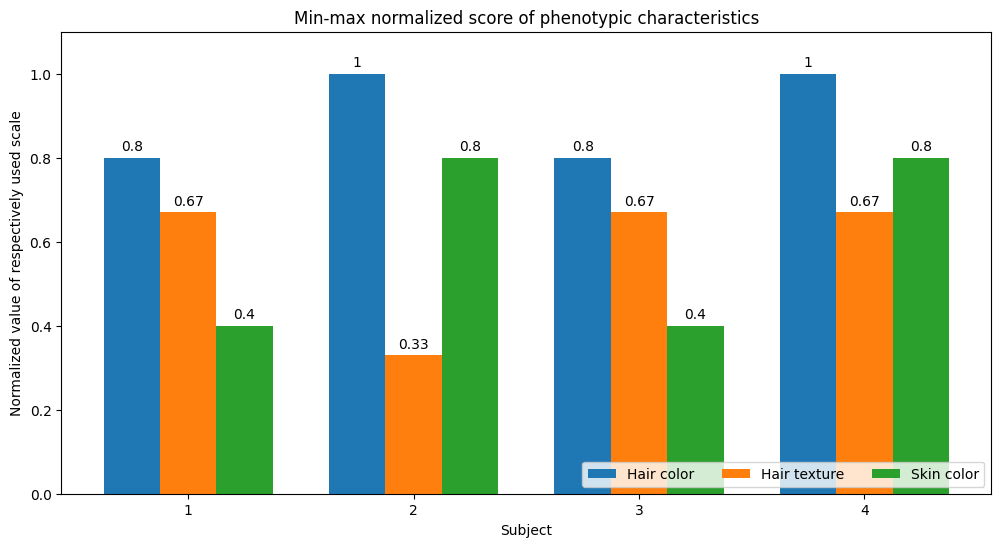

In [17]:
subjects = ['1', '2', '3', '4']
x = np.arange(len(subjects))  
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(12,6))

for attribute, measurement in dfPheno_Nback[['Hair color', 'Hair texture', 'Skin color']].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Normalized value of respectively used scale')
ax.set_xlabel('Subject')
ax.set_title('Min-max normalized score of phenotypic characteristics')
ax.set_xticks(x + width, subjects)
ax.legend(loc='lower right', ncols=4)
ax.set_ylim(0, 1.1)
if export:
    plt.savefig('pheno_data_n_back.png')
plt.show()

#### FTT

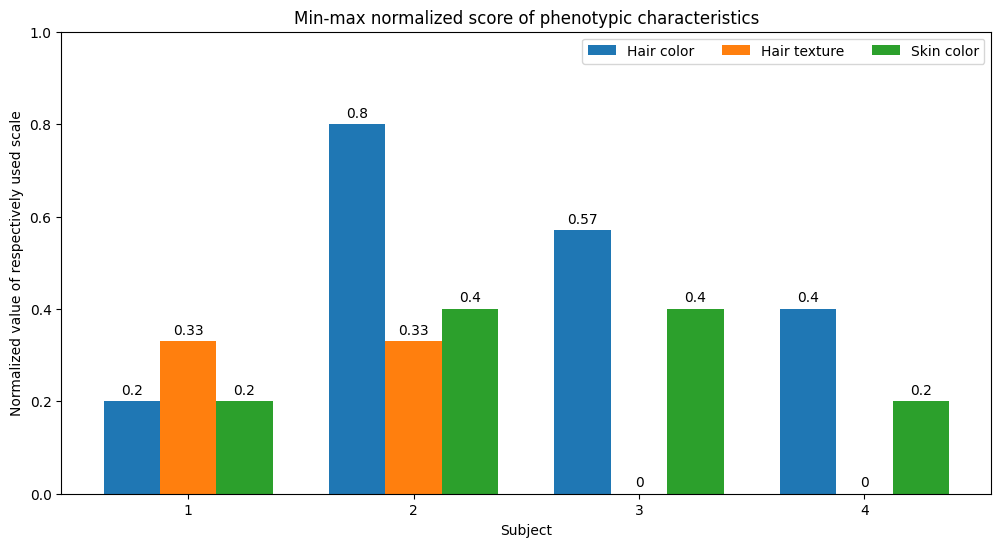

In [18]:
subjects = ['1', '2', '3', '4']
x = np.arange(len(subjects))  
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(12,6))

for attribute, measurement in dfPheno_FTT[['Hair color', 'Hair texture', 'Skin color']].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Normalized value of respectively used scale')
ax.set_xlabel('Subject')
ax.set_title('Min-max normalized score of phenotypic characteristics')
ax.set_xticks(x + width, subjects)
ax.legend(loc='upper right', ncols=4)
ax.set_ylim(0, 1)
if export:
    plt.savefig('pheno_data_FTT.png')
plt.show()

### Visualize signal quality data

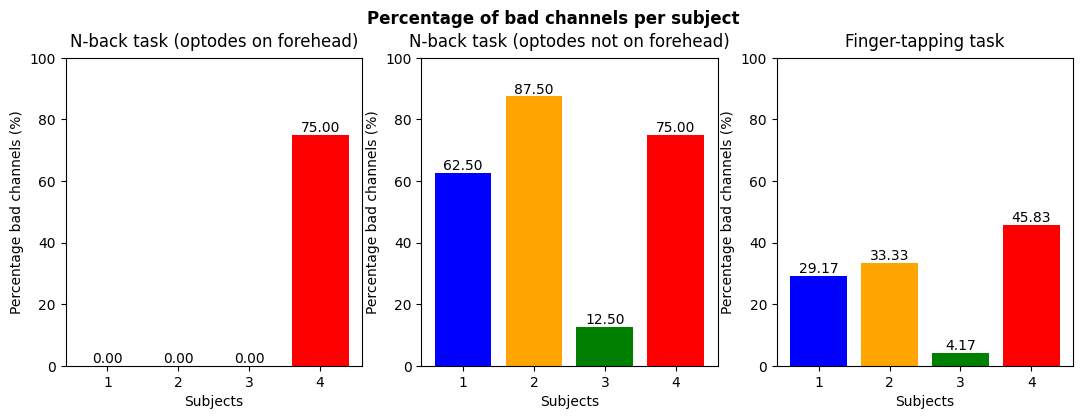

In [19]:
df1 = SQ_forehead
df2 = SQ_hair 
df3 = SQ_FTT

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
fig.suptitle('Percentage of bad channels per subject', y=1, fontweight = 'bold')

bars1 = axes[0].bar(subjects, df1['Percentage bad channels'], color=['blue', 'orange', 'green', 'red'])
axes[0].set_title('N-back task (optodes on forehead)', y=1.01)
axes[0].set_xlabel('Subjects')
axes[0].set_ylabel('Percentage bad channels (%)')
axes[0].set_ylim(0, 100)  

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')

bars2 = axes[1].bar(subjects, df2['Percentage bad channels'], color=['blue', 'orange', 'green', 'red'])
axes[1].set_title('N-back task (optodes not on forehead)', y=1.01)
axes[1].set_xlabel('Subjects')
axes[1].set_ylabel('Percentage bad channels (%)')
axes[1].set_ylim(0, 100)  

for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')

bars3 = axes[2].bar(subjects, df3['Percentage bad channels'], color=['blue', 'orange', 'green', 'red'])
axes[2].set_title('Finger-tapping task', y=1.01)
axes[2].set_xlabel('Subjects')
axes[2].set_ylabel('Percentage bad channels (%)')
axes[2].set_ylim(0, 100) 

for bar in bars3:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')

if export:
        plt.savefig('SQ_percentages.png')
plt.show()

### Visualize relationship hair color/texture and signal quality

In [20]:
SQ_FTT = SQ_FTT.reset_index()
SQ_FTT.columns = ['Subject', 'Percentage bad channels']
SQ_FTT['Subject'] = np.arange(1,5)
FTT = pd.merge(dfPheno_FTT, SQ_FTT, on = 'Subject')
SQ_hair = SQ_hair.reset_index()
SQ_hair.columns = ['Subject', 'Percentage bad channels']
SQ_hair['Subject'] = np.arange(1,5)
hair = pd.merge(dfPheno_Nback, SQ_hair, on = 'Subject')
hair['Subject'] = np.arange(5,9)
result_hair_color_texture = pd.concat([FTT, hair])
result_hair_color_texture

,Subject,Hair color,Hair texture,Skin color,Percentage bad channels
0,1.0,0.20,0.33,0.2,29.17
1,2.0,0.80,0.33,0.4,33.33
2,3.0,0.57,0.00,0.4,4.17
3,4.0,0.40,0.00,0.2,45.83
0,5.0,0.80,0.67,0.4,62.50
1,6.0,1.00,0.33,0.8,87.50
2,7.0,0.80,0.67,0.4,12.50
3,8.0,1.00,0.67,0.8,75.00


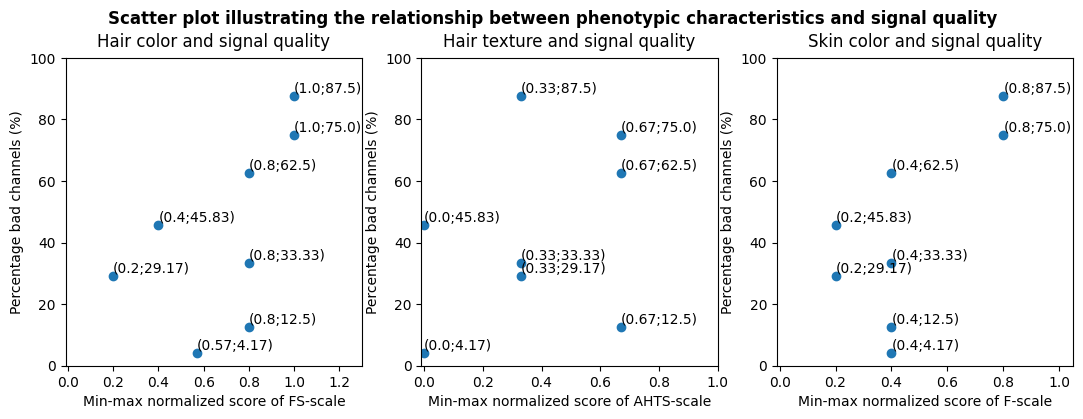

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
fig.suptitle('Scatter plot illustrating the relationship between phenotypic characteristics and signal quality', y=1, fontweight = 'bold')
axes[0].scatter(result_hair_color_texture['Hair color'], result_hair_color_texture['Percentage bad channels'])
axes[0].set_title('Hair color and signal quality', y=1.01)
axes[0].set_xlabel('Min-max normalized score of FS-scale')
axes[0].set_ylabel('Percentage bad channels (%)')
axes[0].set_ylim(-0.01, 100)  
axes[0].set_xlim(-0.01, 1.3)  
for (xi, yi) in zip(result_hair_color_texture['Hair color'], result_hair_color_texture['Percentage bad channels']):
    axes[0].text(xi, yi, '('+ str(xi) +';' + str(yi)+')', va='bottom', ha='left')

axes[1].scatter(result_hair_color_texture['Hair texture'], result_hair_color_texture['Percentage bad channels'])
axes[1].set_title('Hair texture and signal quality', y=1.01)
axes[1].set_xlabel('Min-max normalized score of AHTS-scale')
axes[1].set_ylabel('Percentage bad channels (%)')
axes[1].set_ylim(-0.01, 100) 
axes[1].set_xlim(-0.01, 1) 
for (xi, yi) in zip(result_hair_color_texture['Hair texture'], result_hair_color_texture['Percentage bad channels']):
    axes[1].text(xi, yi, '('+ str(xi) +';' + str(yi)+')', va='bottom', ha='left')

axes[2].scatter(result_hair_color_texture['Skin color'], result_hair_color_texture['Percentage bad channels'])
axes[2].set_title('Skin color and signal quality', y=1.01)
axes[2].set_xlabel('Min-max normalized score of F-scale')
axes[2].set_ylabel('Percentage bad channels (%)')
axes[2].set_ylim(-0.01, 100) 
axes[2].set_xlim(-0.01, 1.05) 
for (xi, yi) in zip(result_hair_color_texture['Skin color'], result_hair_color_texture['Percentage bad channels']):
    axes[2].text(xi, yi, '('+ str(xi) +';' + str(yi)+')', va='bottom', ha='left')

if export:
        plt.savefig('Scatter_1_independent_var.png')
plt.show()

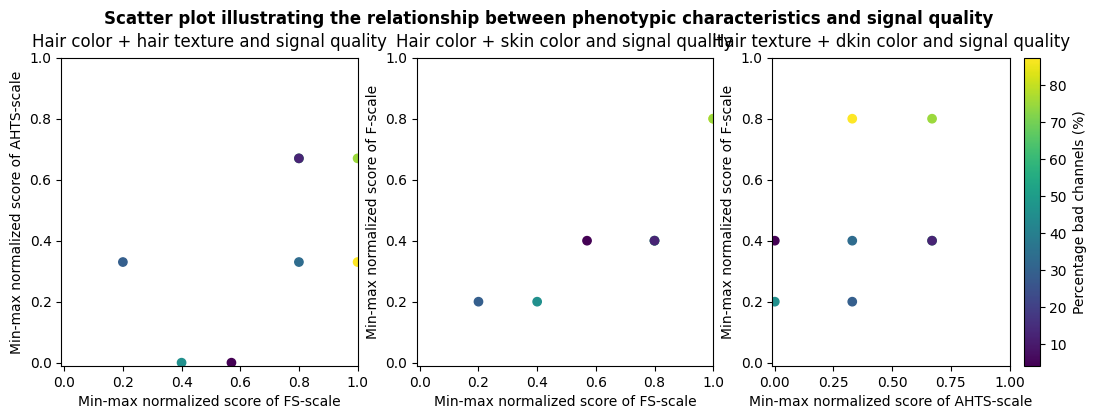

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
fig.suptitle('Scatter plot illustrating the relationship between phenotypic characteristics and signal quality', y=1, fontweight = 'bold')

scatter = axes[0].scatter(result_hair_color_texture['Hair color'], result_hair_color_texture['Hair texture'],c= result_hair_color_texture['Percentage bad channels'])
axes[0].set_title('Hair color + hair texture and signal quality', y=1.01)
axes[0].set_xlabel('Min-max normalized score of FS-scale')
axes[0].set_ylabel('Min-max normalized score of AHTS-scale')
axes[0].set_ylim(-0.01, 1) 
axes[0].set_xlim(-0.01, 1)

scatter = axes[1].scatter(result_hair_color_texture['Hair color'], result_hair_color_texture['Skin color'],c= result_hair_color_texture['Percentage bad channels'])
axes[1].set_title('Hair color + skin color and signal quality', y=1.01)
axes[1].set_xlabel('Min-max normalized score of FS-scale')
axes[1].set_ylabel('Min-max normalized score of F-scale')
axes[1].set_ylim(-0.01, 1) 
axes[1].set_xlim(-0.01, 1)

scatter = axes[2].scatter(result_hair_color_texture['Hair texture'], result_hair_color_texture['Skin color'],c= result_hair_color_texture['Percentage bad channels'])
axes[2].set_title('Hair texture + dkin color and signal quality', y=1.01)
axes[2].set_xlabel('Min-max normalized score of AHTS-scale')
axes[2].set_ylabel('Min-max normalized score of F-scale')
axes[2].set_ylim(-0.01, 1) 
axes[2].set_xlim(-0.01, 1)

fig.colorbar(scatter, label ='Percentage bad channels (%)')

if export:
        plt.savefig('Scatter_2_independent_var.png')
plt.show()

### Visualize relationship skin color and signal quality

In [23]:
SQ_forehead = SQ_forehead.reset_index()
SQ_forehead.columns = ['Subject', 'Percentage bad channels']
SQ_forehead['Subject'] = np.arange(1,5)
result_skin = pd.merge(dfPheno_Nback, SQ_forehead, on = 'Subject')

In [24]:
result_skin

,Subject,Hair color,Hair texture,Skin color,Percentage bad channels
0,1.0,0.8,0.67,0.4,0.0
1,2.0,1.0,0.33,0.8,0.0
2,3.0,0.8,0.67,0.4,0.0
3,4.0,1.0,0.67,0.8,75.0


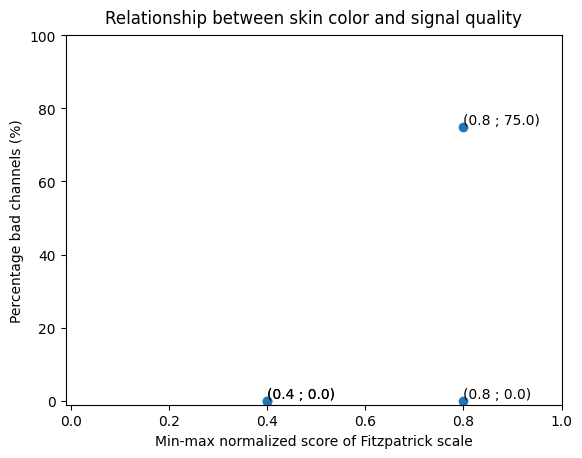

In [25]:
plt.scatter(result_skin['Skin color'], result_skin['Percentage bad channels'])
plt.title('Relationship between skin color and signal quality', y=1.01)
plt.xlabel('Min-max normalized score of Fitzpatrick scale')
plt.ylabel('Percentage bad channels (%)')
plt.ylim(-1, 100)  
plt.xlim(-0.01, 1)  
for (xi, yi) in zip(result_skin['Skin color'], result_skin['Percentage bad channels']):
    plt.text(xi, yi, '('+ str(xi) +' ; ' + str(yi)+')', va='bottom', ha='left')

if export:
        plt.savefig('Scatter_skin_color.png')
plt.show()

### Statistical analysis hairy region

#### Correlation

In [26]:
correlation_matrix = result_hair_color_texture.drop('Subject', axis = 1).corr(numeric_only = False).style.background_gradient(cmap='Blues')
correlation_matrix

,Hair color,Hair texture,Skin color,Percentage bad channels
Hair color,1.000000,0.561865,0.865134,0.544069
Hair texture,0.561865,1.000000,0.403067,0.323894
Skin color,0.865134,0.403067,1.000000,0.674438
Percentage bad channels,0.544069,0.323894,0.674438,1.000000


In [27]:
if export:
    dfi.export(correlation_matrix,"Corr_hairy_region.png")

#### Multiple regression analysis

In [28]:
result_hair_color_texture = result_hair_color_texture.apply(pd.to_numeric).round(2)
result_hair_color_texture

,Subject,Hair color,Hair texture,Skin color,Percentage bad channels
0,1.0,0.20,0.33,0.2,29.17
1,2.0,0.80,0.33,0.4,33.33
2,3.0,0.57,0.00,0.4,4.17
3,4.0,0.40,0.00,0.2,45.83
0,5.0,0.80,0.67,0.4,62.50
1,6.0,1.00,0.33,0.8,87.50
2,7.0,0.80,0.67,0.4,12.50
3,8.0,1.00,0.67,0.8,75.00


In [34]:
# Independent variables
X = result_hair_color_texture[['Hair color', 'Hair texture', 'Skin color']]

# Dependent variable
y = result_hair_color_texture['Percentage bad channels']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression results
model_summary, coeff_table, assumptions_test = model.summary().tables

C:\Users\fabia\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
model_summary

Dep. Variable:,Percentage bad channels,R-squared:,0.472
Model:,OLS,Adj. R-squared:,0.076
Method:,Least Squares,F-statistic:,1.193
Date:,"Wed, 05 Jun 2024",Prob (F-statistic):,0.419
Time:,21:52:07,Log-Likelihood:,-35.349
No. Observations:,8,AIC:,78.70
Df Residuals:,4,BIC:,79.02
Df Model:,3,,
Covariance Type:,nonrobust,,


In [39]:
coeff_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.2249,28.423,0.325,0.762,-69.690,88.140
Hair color,-27.7138,84.919,-0.326,0.761,-263.488,208.060
Hair texture,13.7308,47.312,0.290,0.786,-117.628,145.090
Skin color,108.1595,93.745,1.154,0.313,-152.119,368.438


In [37]:
assumptions_test

Omnibus:,0.651,Durbin-Watson:,2.121
Prob(Omnibus):,0.722,Jarque-Bera (JB):,0.560
Skew:,-0.324,Prob(JB):,0.756
Kurtosis:,1.877,Cond. No.,16.9


### Statistical analysis hairless region

In [46]:
result_skin = result_skin.apply(pd.to_numeric).round(2)

#### Corelation

In [47]:
correlation = result_skin['Skin color'].corr(result_skin['Percentage bad channels'])
print('Correlation between Skin color and Percentage bad channels: ' + str(correlation))

Correlation between Skin color and Percentage bad channels: 0.5773502691896257


#### T-test

In [52]:
# Group data by skin color
group1 = result_skin[result_skin['Skin color'] == 0.4]['Percentage bad channels']
group2 = result_skin[result_skin['Skin color'] == 0.8]['Percentage bad channels']

# Not possible due to small sample size
# # Shapiro-Wilk test for normality
# shapiro_group1 = shapiro(group1)
# shapiro_group2 = shapiro(group2)

# print('Shapiro-Wilk test for group1: W= ' + str(shapiro_group1[0]) + ', p-value=' + str(shapiro_group1[1]))
# print('Shapiro-Wilk test for group2: W= ' + str(shapiro_group2[0]) + ', p-value=' + str(shapiro_group2[1]))

# Levene's test for homogeneity of variances
levene_test = levene(group1, group2)

print("Levene's test: W=" + str(levene_test[0]) + ', p-value=' +str(levene_test[1]))

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances
print('T-statistic: ' + str(t_stat) + ', P-value: ' + str(p_value))

Levene's test: W=inf, p-value=0.0
T-statistic: -1.0, P-value: 0.49999999999999956


C:\Users\fabia\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:2643: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom
